In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [6]:
google_data.shape

(4931, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4.931000e+03
mean,42.967669,43.422152,42.534974,42.986666,42.986666,1.175052e+08
std,40.193245,40.646457,39.790066,40.223545,40.223545,1.505625e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.907121,13.038129,12.786324,12.917083,12.917083,2.808300e+07
50%,26.777981,26.950001,26.539499,26.748562,26.748562,5.884374e+07
75%,58.811499,59.327499,58.139999,58.720251,58.720251,1.455033e+08
max,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4931 entries, 2004-08-19 to 2024-03-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4931 non-null   float64
 1   High       4931 non-null   float64
 2   Low        4931 non-null   float64
 3   Close      4931 non-null   float64
 4   Adj Close  4931 non-null   float64
 5   Volume     4931 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 269.7 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

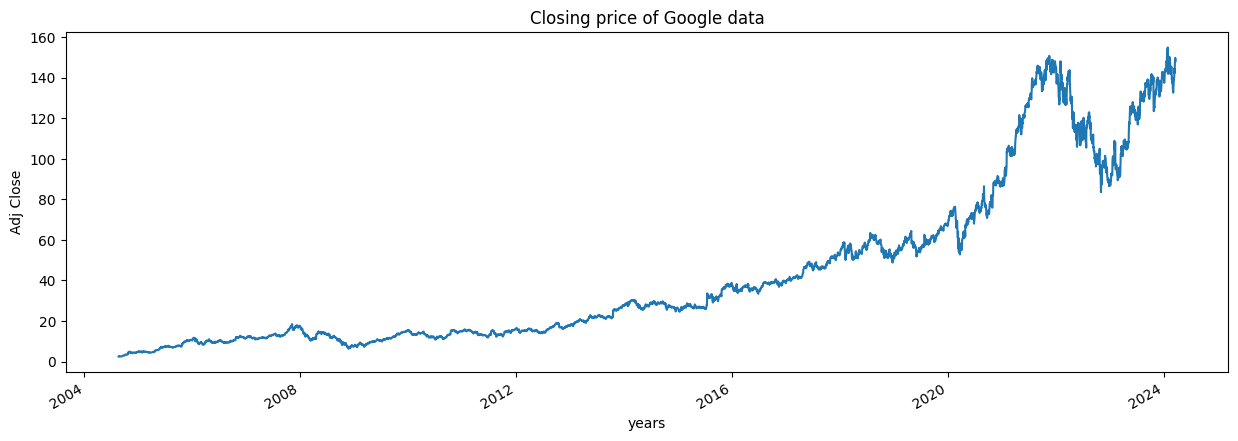

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

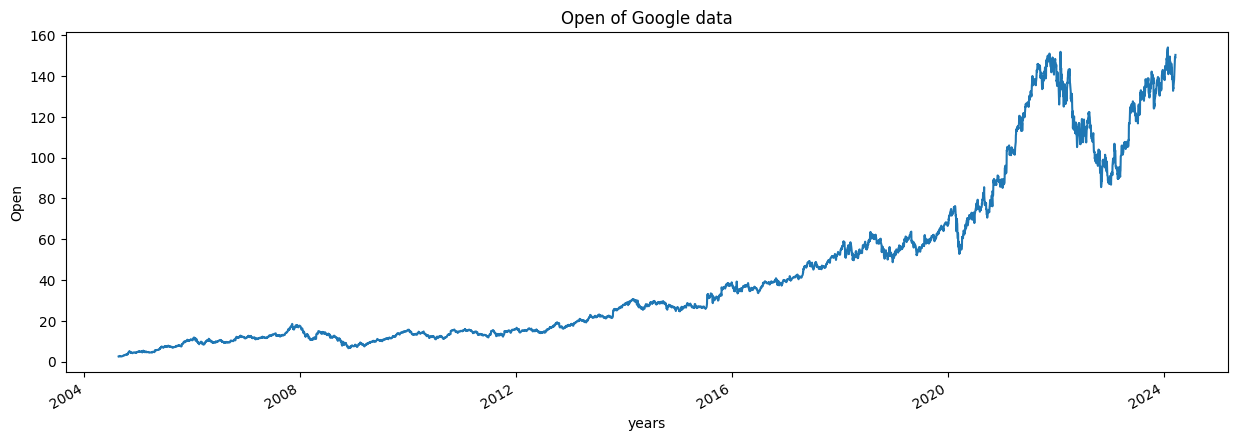

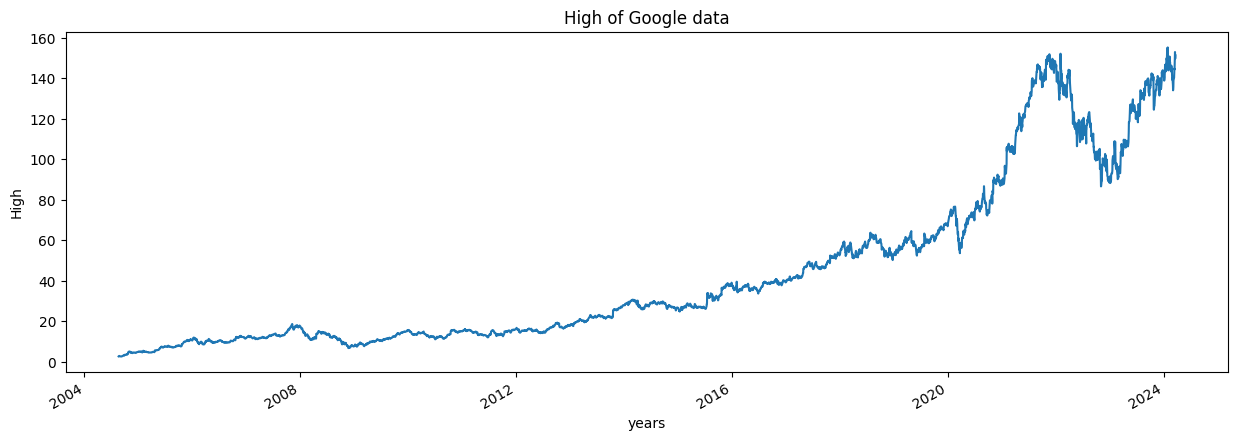

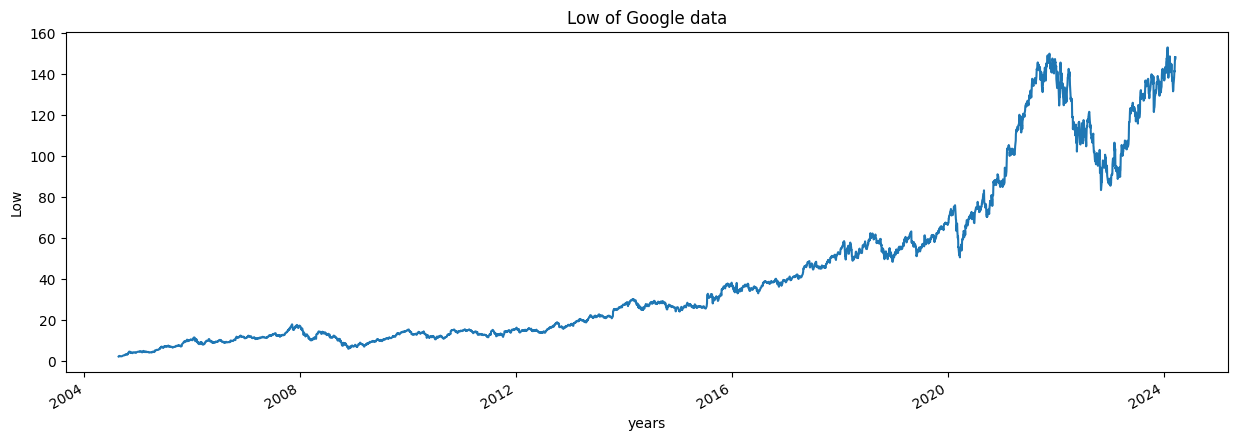

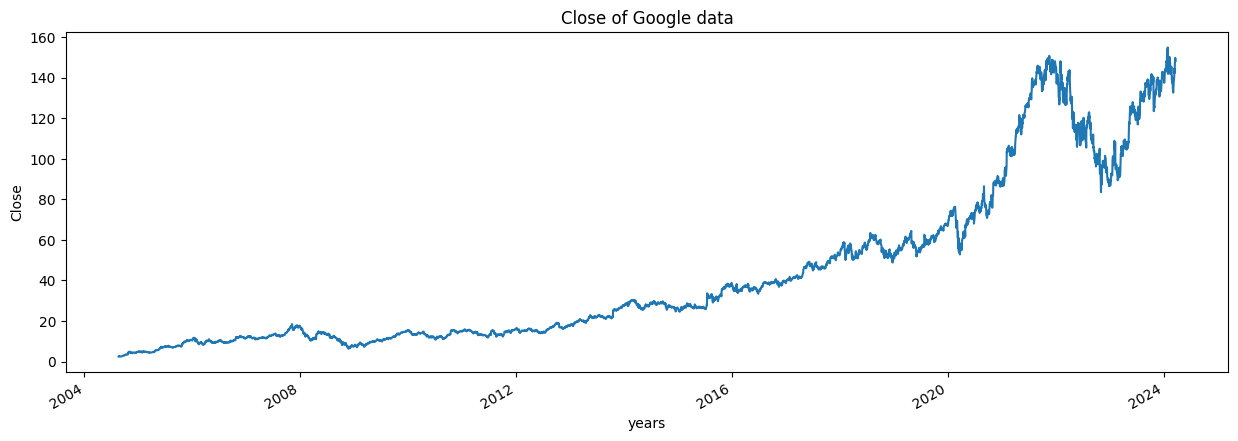

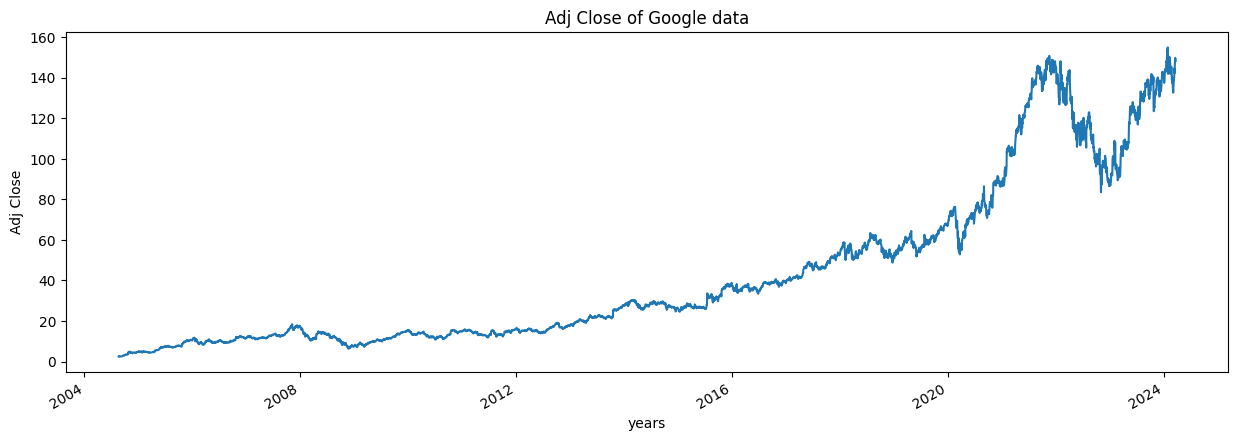

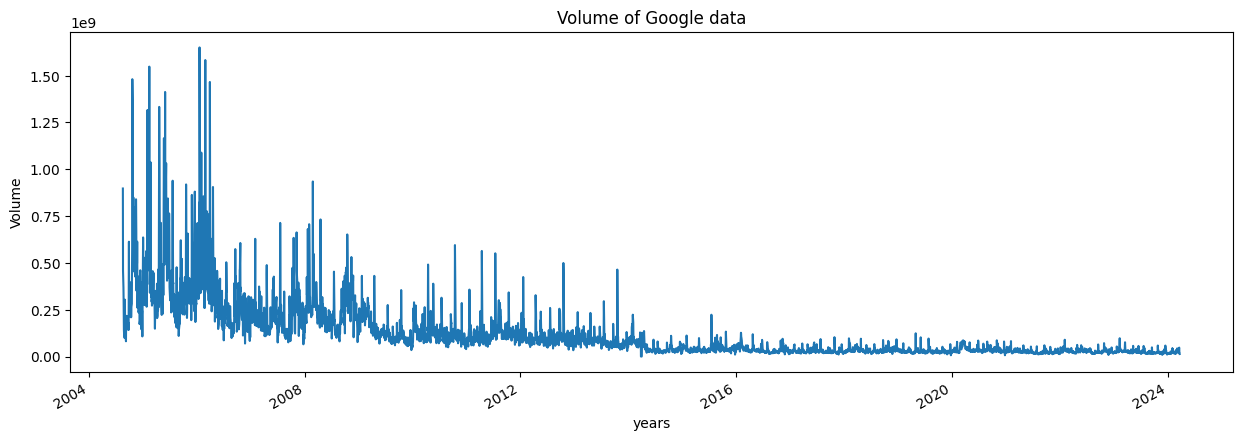

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
10, 20, 30, 40, 50, 60, 70, 80, 90, 100

MA for 5 days ==> null null null null 30 40 50 60 70 80

SyntaxError: invalid syntax (4108087205.py, line 3)

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 56


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.034039
Name: MA_for_250_days, dtype: float64

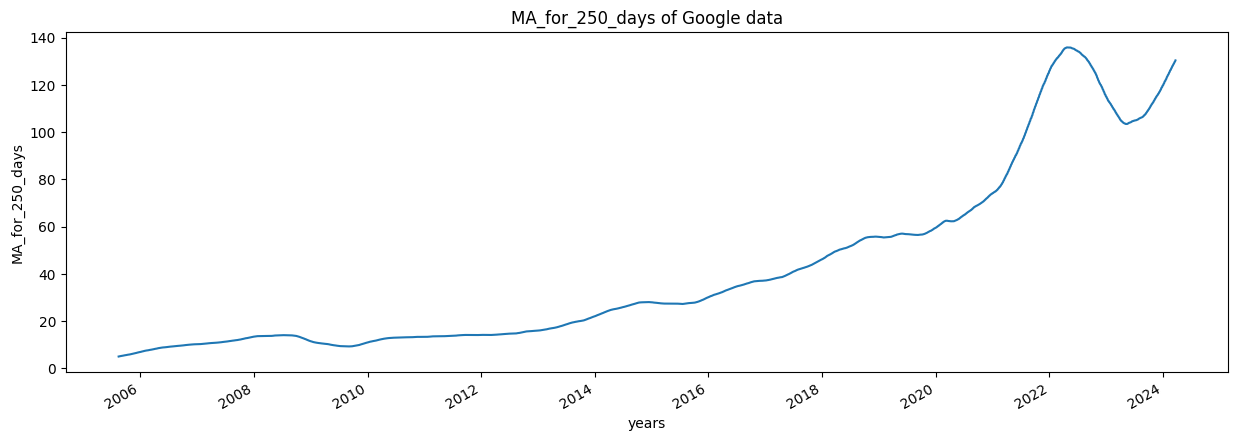

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

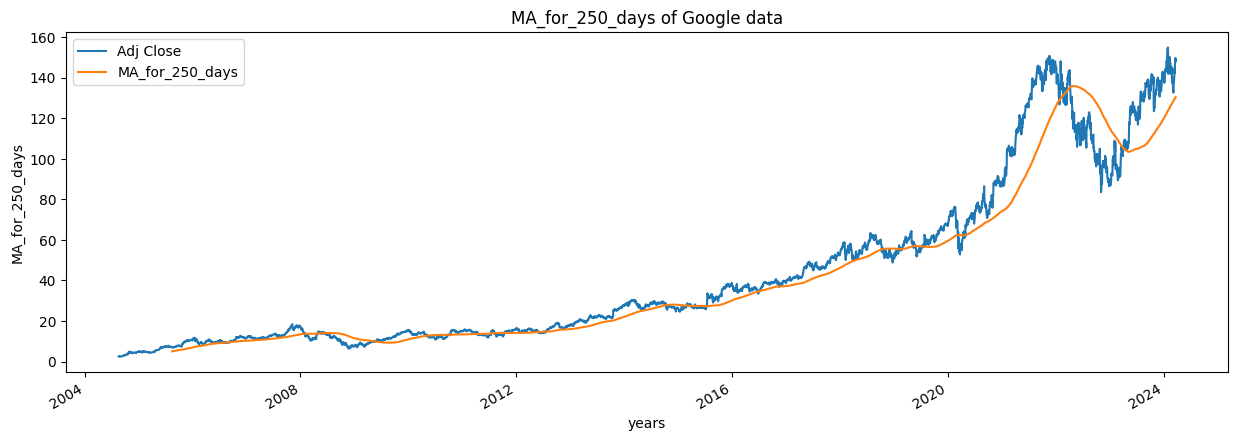

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

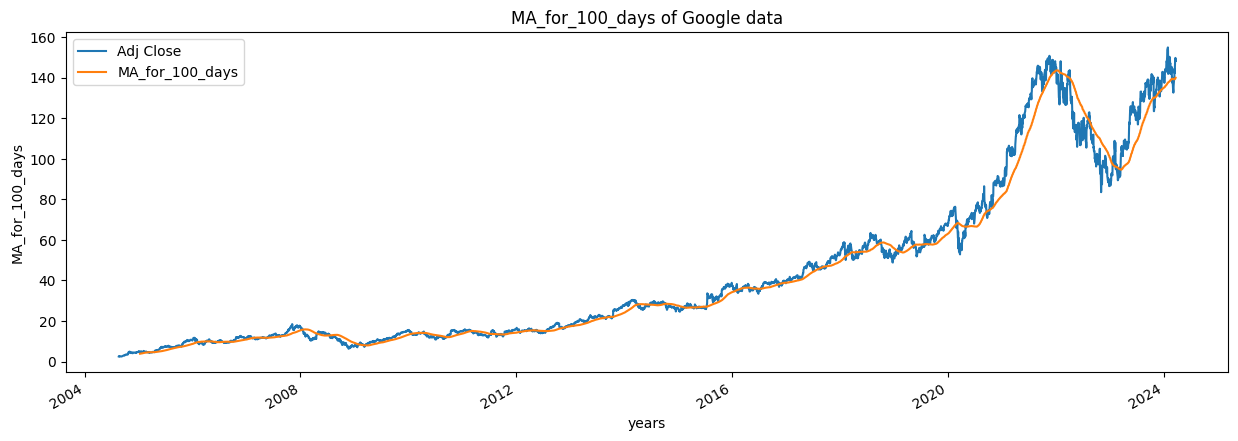

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

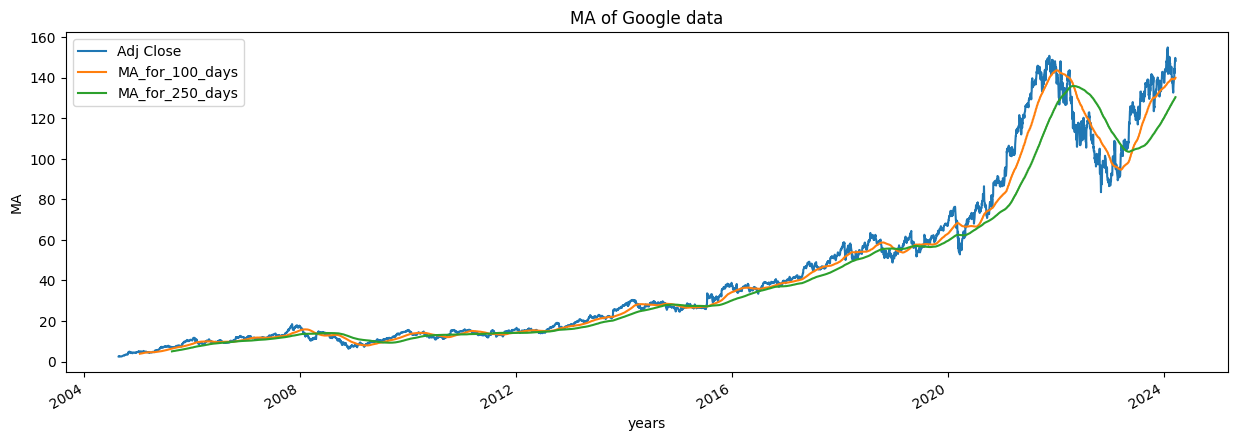

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,0.079430
2004-08-23,2.724787,0.010064
2004-08-24,2.611960,-0.041408
2004-08-25,2.640104,0.010775


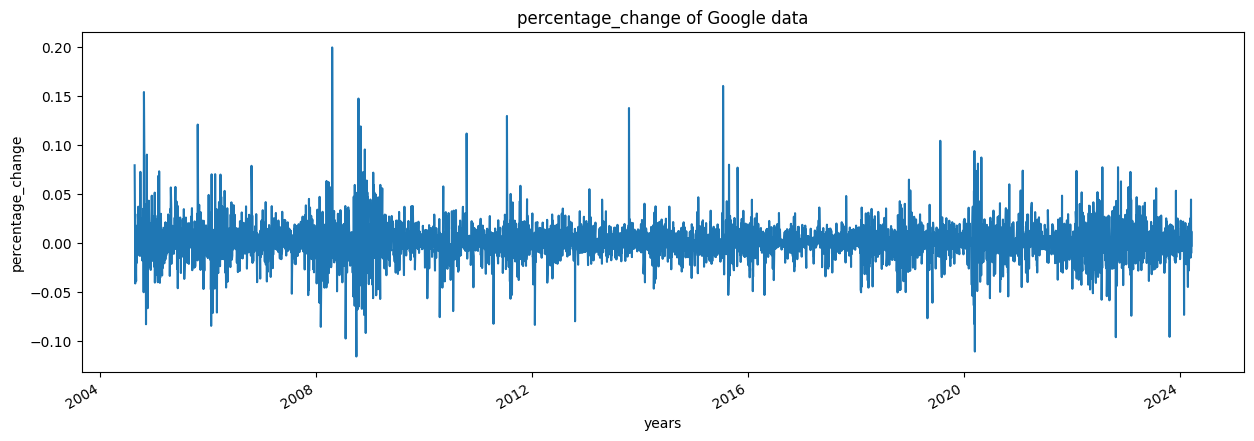

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([154.83999634]), array([2.49091291]))

In [30]:
# pip install scikit-learn

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[5.39563192e-05],
       [1.35692365e-03],
       [1.53511972e-03],
       ...,
       [9.54578012e-01],
       [9.66130392e-01],
       [9.56783464e-01]])

In [32]:
len(scaled_data)

4931

In [33]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([[5.39563192e-05],
        [1.35692365e-03],
        [1.53511972e-03],
        [7.94537238e-04],
        [9.79271669e-04],
        [1.29152755e-03],
        [1.00379442e-03],
        [3.26972665e-04],
        [3.85825710e-04],
        [3.92395367e-05],
        [2.45227543e-04],
        [0.00000000e+00],
        [2.56673581e-04],
        [3.74384367e-04],
        [3.76018174e-04],
        [8.69739308e-04],
        [1.22449765e-03],
        [1.87680291e-03],
        [1.96017714e-03],
        [2.28223900e-03],
        [2.85770682e-03],
        [3.16341965e-03],
        [2.91492449e-03],
        [3.00320171e-03],
        [3.40210883e-03],
        [3.24025709e-03],
        [2.98358977e-03],
        [4.38955110e-03],
        [5.07945427e-03],
        [4.83749591e-03],
        [5.32468025e-03],
        [5.73011634e-03],
        [6.27124917e-03],
        [6.06035818e-03],
        [6.34972042e-03],
        [6.16662136e-03],
        [5.76281752e-03],
        [6.11267287e-03],
        [6.6

In [35]:
int(len(x_data)*0.7)

3381

In [36]:
4908-100-int(len(x_data)*0.7)

1427

In [37]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3381, 100, 1)
(3381, 1)
(1450, 100, 1)
(1450, 1)


In [39]:
# pip install keras

In [40]:
# pip install tensorflow

In [41]:
#import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3381/3381 [==============================] - 304s 88ms/step - loss: 1.5802e-04
Epoch 2/2
3381/3381 [==============================] - 169s 50ms/step - loss: 8.4433e-05


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
predictions = model.predict(x_test)

46/46 [==============================] - 3s 49ms/step


In [47]:
predictions

array([[0.36170635],
       [0.36573505],
       [0.3673109 ],
       ...,
       [0.87878925],
       [0.8859704 ],
       [0.8928051 ]], dtype=float32)

In [48]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.596542],
       [ 58.21031 ],
       [ 58.450394],
       ...,
       [136.37364 ],
       [137.4677  ],
       [138.50896 ]], dtype=float32)

In [49]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.67300034],
       [ 58.40299988],
       [ 58.49200058],
       ...,
       [147.91999817],
       [149.67999268],
       [148.2559967 ]])

In [50]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [51]:
rmse

5.114763411073583

In [52]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-06-18,58.673000,57.596542
2018-06-19,58.403000,58.210312
2018-06-20,58.492001,58.450394
2018-06-21,57.882999,58.535179
2018-06-22,57.773998,58.262318


<Figure size 640x480 with 0 Axes>

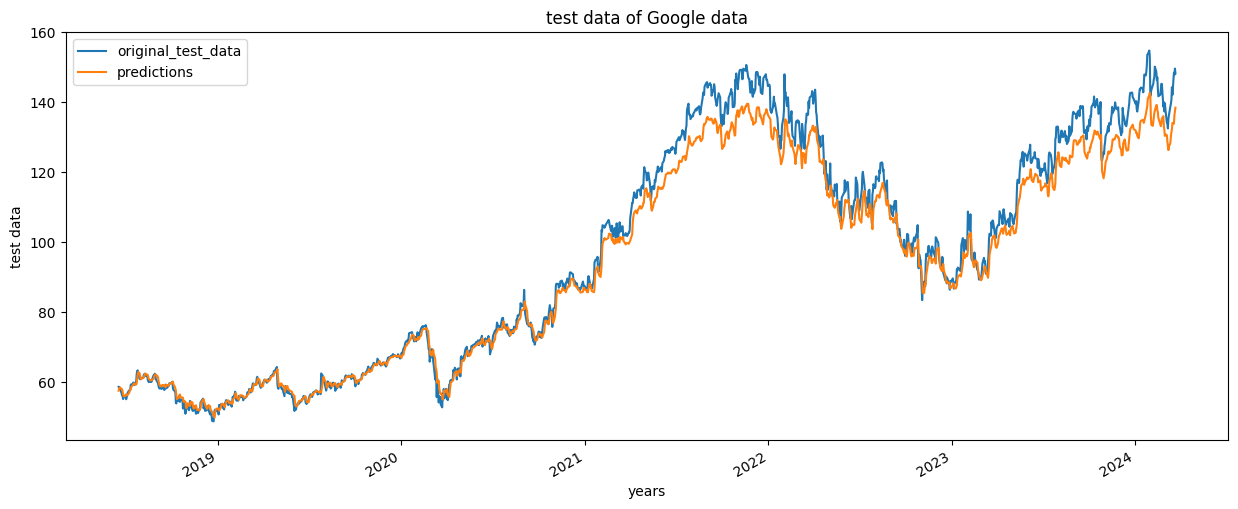

In [53]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

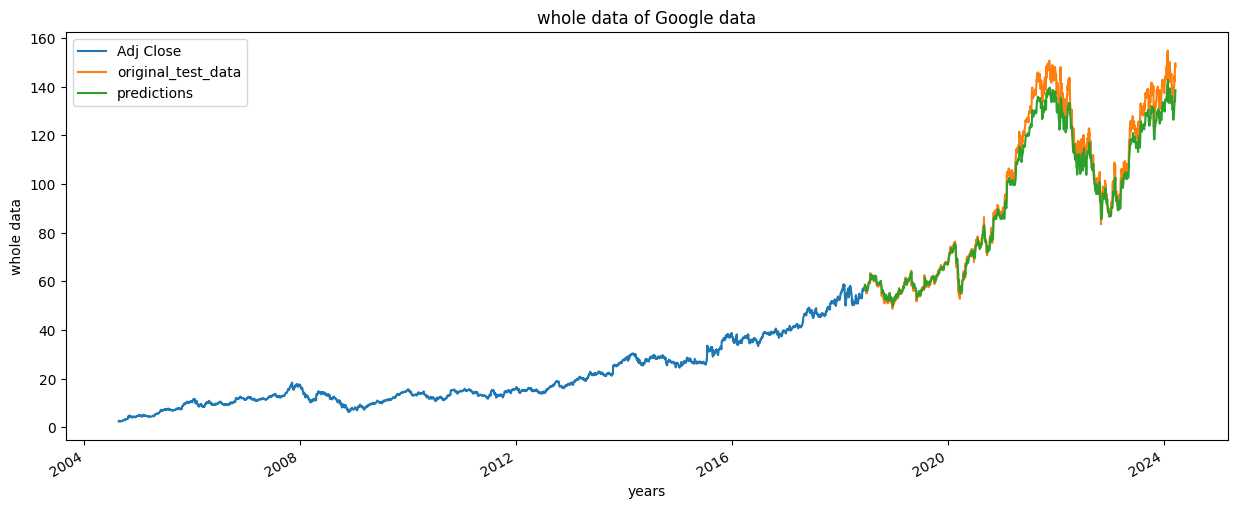

In [54]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [55]:
model.save("Latest_stock_price_model.keras")